# This notebook contains the tasks for "Segmenting and Clustering neigbourhoods in Toronto" coursera assignment

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
import numpy as np
import pandas as pd 
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-

In [4]:
!pip install lxml html5lib beautifulsoup4


     |████████████████████████████████| 5.5MB 5.3MB/s eta 0:00:01     |████████▍                       | 1.4MB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 122kB 8.9MB/s eta 0:00:01


## Reading the webpage

In [7]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs=pd.read_html(url)

In [8]:
dfs[0]

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


## Cleaning our dataframe

In [9]:
#removing all rows with "Not Assigned" borough
new_df = dfs[0][~dfs[0]["Borough"].str.contains("Not assigned")]


In [10]:
new_df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
#checking if there is a borough with a "Not assigned" neigbourhood
new_df[new_df['Neighborhood'].str.contains("Not assigned")]

,Postal Code,Borough,Neighborhood


In [13]:
new_df.shape

(103, 3)

## Getting lattitude and longitude

In [41]:
latitude =[]
longitude =[]
geolocator = Nominatim(user_agent="Toronto_explorer")
for postal_code in new_df['Postal Code']:
    location =  geolocator.geocode('{}, Toronto, Ontario'.format(postal_code))     
    if location == None:
        latitude.append('Na')
        longitude.append('Na')
    else:   
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    

In [43]:
longitude

[-79.3839347,
 'Na',
 'Na',
 'Na',
 -79.3839347,
 'Na',
 -79.3839347,
 'Na',
 'Na',
 'Na',
 'Na',
 -79.5419018239487,
 -79.3839347,
 -79.3469614,
 'Na',
 'Na',
 'Na',
 -79.58890692194828,
 'Na',
 'Na',
 -79.3774455,
 'Na',
 -79.22189842824983,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.38269494796646,
 'Na',
 'Na',
 -79.3661846,
 'Na',
 'Na',
 -79.38283994999999,
 -79.40753862886237,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.4349584391061,
 'Na',
 'Na',
 'Na',
 -79.30405834999999,
 'Na',
 'Na',
 'Na',
 'Na',
 -79.4160307769213,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.41659335433374,
 'Na',
 'Na',
 'Na',
 -79.48319225216662,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.46387718133434,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.55088985426742,
 'Na',
 'Na',
 'Na',
 -79.47467561164675,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.39298744692186,
 'Na',
 'Na',
 -79.32772103687638,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 -79.3692816,
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na']

Since nominatim doesn't give me all the coordinates I need I will use the provided csv

In [44]:
#downloading the file
!wget -q -O 'neighbourhoods.csv' http://cocl.us/Geospatial_data

In [46]:
#loading the coordinates in a df
coor_df = pd.read_csv('neighbourhoods.csv')

In [47]:
coor_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [50]:
#merging both dataframes using Postal Code as a key
df=pd.merge(new_df,coor_df,on=['Postal Code'])

In [51]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [61]:
#getting the Boroughs that contain Toronto
tor_df=df[df['Borough'].str.contains('Toronto')]

In [62]:
tor_df.shape

(39, 5)

In [63]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [64]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tor_df['Latitude'], tor_df['Longitude'], tor_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Exploring each neighborhood

In [67]:
#Copy of the function used in 3-3-2 lab
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
%store -r CLIENT_ID
%store -r CLIENT_SECRET
VERSION = '20180605'
limit = 100

In [70]:
toronto_venues = getNearbyVenues(names=tor_df['Neighborhood'],
                                   latitudes=tor_df['Latitude'],
                                   longitudes=tor_df['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [76]:
#Checking how many results we got for each neighbourhood:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,67,67,67,67,67,67
Christie,17,17,17,17,17,17
Church and Wellesley,80,80,80,80,80,80
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


In [79]:
#showing the venues of neighborhoods with less than 10 venues
toronto_venues.groupby("Neighborhood").filter(lambda x: len(x) < 10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
254,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
255,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
256,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
257,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
983,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
984,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
985,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
986,Roselawn,43.711695,-79.416936,Ceiling Champions,43.713891,-79.420702,Home Service
987,Roselawn,43.711695,-79.416936,Rosalind's Garden Oasis,43.712189,-79.411978,Garden
988,Roselawn,43.711695,-79.416936,Havergal College,43.712108,-79.411680,Music Venue


I will remove the neighborhoods with less than 10 venues from our analysis 

In [83]:
toronto_venues_filtered = toronto_venues.groupby("Neighborhood").filter(lambda x: len(x) >= 10)

In [84]:
toronto_venues_filtered.shape

(1599, 7)

In [85]:
print('There are {} uniques categories.'.format(len(toronto_venues_filtered['Venue Category'].unique())))

There are 236 uniques categories.


### One hot encoding

In [91]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_filtered[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood_name'] = toronto_venues_filtered['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood_name,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
toronto_grouped = toronto_onehot.groupby('Neighborhood_name').mean().reset_index()

In [93]:
toronto_grouped

,Neighborhood_name,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.052632
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0000,0.0625,0.0625,0.0625,0.125,0.1875,0.0625,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,Central Bay Street,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.014925,0.000000,0.000000,0.014925,0.0000,0.000000,0.014925
5,Christie,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,Church and Wellesley,0.0125,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.012500,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0125,0.000000,0.025000
7,"Commerce Court, Victoria Hotel",0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.040000,0.000000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.0000,0.000000,0.000000
8,Davisville,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.028571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000


In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_name'] = toronto_grouped['Neighborhood_name']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Beer Bar,Restaurant,Seafood Restaurant,Liquor Store,Basketball Stadium
1,"Brockton, Parkdale Village, Exhibition Place",Café,Performing Arts Venue,Coffee Shop,Breakfast Spot,Gym,Bakery,Nightclub,Pet Store,Climbing Gym,Restaurant
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Yoga Studio,Spa,Gym / Fitness Center,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Boutique,Harbor / Marina,Boat or Ferry,Rental Car Location,Plane,Coffee Shop,Sculpture Garden,Airport Terminal
4,Central Bay Street,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sandwich Place,Café,Department Store,Dessert Shop,Thai Restaurant,Salad Place,Burger Joint


### Clustering

First we need to evaluate how many clusters we need. For this we can use the elbow methood

In [97]:
import matplotlib.pyplot as plt

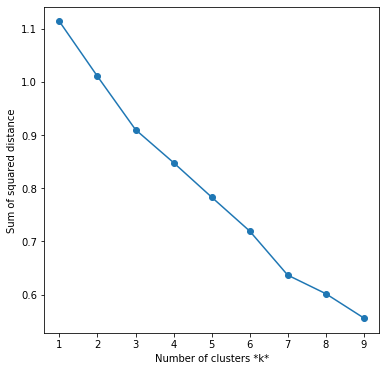

In [100]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood_name', 1)
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(toronto_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The Graph looks pretty even but my best guess would be k=7

In [108]:
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering )

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 5, 1, 2, 0, 3, 0, 0, 0, 4], dtype=int32)

In [115]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [128]:
tor_df.head()

,Postal Code,Borough,Neighborhood_name,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [126]:
tor_df.shape

(39, 5)

In [127]:
neighborhoods_venues_sorted.shape

(32, 12)

In [130]:
#merging our databases
merged = tor_df.merge(neighborhoods_venues_sorted,on=['Neighborhood_name'])


In [131]:
merged

,Postal Code,Borough,Neighborhood_name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Discount Store,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hobby Shop,General Entertainment
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Italian Restaurant,Diner,Bakery
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Beer Bar,Restaurant,Seafood Restaurant,Liquor Store,Basketball Stadium
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sandwich Place,Café,Department Store,Dessert Shop,Thai Restaurant,Salad Place,Burger Joint
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Grocery Store,Café,Park,Restaurant,Candy Store,Diner,Athletics & Sports,Italian Restaurant,Baby Store,Coffee Shop
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Hotel,Thai Restaurant,Sushi Restaurant,Concert Hall,Clothing Store
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,4,Pharmacy,Bakery,Park,Furniture / Home Store,Music Venue,Middle Eastern Restaurant,Café,Brewery,Bar,Bank
9,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Scenic Lookout,Restaurant,Sporting Goods Shop,Brewery,Bar


Creating the map


In [133]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'],merged['Longitude'], merged['Neighborhood_name'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

And printing the contents of each cluster:

#### Cluster 1:

In [142]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
1,"Queen's Park, Ontario Provincial Government",Coffee Shop,Sushi Restaurant,Yoga Studio,Discount Store,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hobby Shop,General Entertainment
2,"Garden District, Ryerson",Clothing Store,Coffee Shop,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Italian Restaurant,Diner,Bakery
3,St. James Town,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
4,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Beer Bar,Restaurant,Seafood Restaurant,Liquor Store,Basketball Stadium
5,Central Bay Street,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sandwich Place,Café,Department Store,Dessert Shop,Thai Restaurant,Salad Place,Burger Joint
7,"Richmond, Adelaide, King",Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Hotel,Thai Restaurant,Sushi Restaurant,Concert Hall,Clothing Store
9,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Scenic Lookout,Restaurant,Sporting Goods Shop,Brewery,Bar
12,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Salad Place,Sporting Goods Shop
15,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Tea Room


#### Cluster 2

In [143]:
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"India Bazaar, The Beaches West",Park,Fast Food Restaurant,Gym,Pub,Light Rail Station,Sandwich Place,Burrito Place,Restaurant,Italian Restaurant,Intersection
18,"North Toronto West, Lawrence Park",Coffee Shop,Clothing Store,Yoga Studio,Sporting Goods Shop,Gym / Fitness Center,Health & Beauty Service,Fast Food Restaurant,Diner,Metro Station,Mexican Restaurant
25,"Summerhill West, Rathnelly, South Hill, Forest...",Pub,Coffee Shop,Restaurant,Supermarket,Sushi Restaurant,Bank,Sports Bar,Fried Chicken Joint,Pizza Place,Bagel Shop
31,"Business reply mail Processing Centre, South C...",Light Rail Station,Yoga Studio,Spa,Gym / Fitness Center,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Pizza Place


#### Cluster 3

In [148]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Boutique,Harbor / Marina,Boat or Ferry,Rental Car Location,Plane,Coffee Shop,Sculpture Garden,Airport Terminal


#### Cluster 4

In [149]:
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,Grocery Store,Café,Park,Restaurant,Candy Store,Diner,Athletics & Sports,Italian Restaurant,Baby Store,Coffee Shop


#### Cluster 5

In [150]:
merged.loc[merged['Cluster Labels'] == 4, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Dufferin, Dovercourt Village",Pharmacy,Bakery,Park,Furniture / Home Store,Music Venue,Middle Eastern Restaurant,Café,Brewery,Bar,Bank
17,"High Park, The Junction South",Café,Thai Restaurant,Mexican Restaurant,Arts & Crafts Store,Grocery Store,Fried Chicken Joint,Bakery,Cajun / Creole Restaurant,Furniture / Home Store,Speakeasy


#### Cluster 6

In [151]:
merged.loc[merged['Cluster Labels'] == 5, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,"Little Portugal, Trinity",Bar,Vegetarian / Vegan Restaurant,Restaurant,Café,Asian Restaurant,Coffee Shop,Men's Store,Italian Restaurant,Brewery,Gift Shop
13,"Brockton, Parkdale Village, Exhibition Place",Café,Performing Arts Venue,Coffee Shop,Breakfast Spot,Gym,Bakery,Nightclub,Pet Store,Climbing Gym,Restaurant
19,"The Annex, North Midtown, Yorkville",Sandwich Place,Café,Coffee Shop,Park,History Museum,Donut Shop,Burger Joint,Indian Restaurant,Middle Eastern Restaurant,Pub
20,"Parkdale, Roncesvalles",Breakfast Spot,Gift Shop,Bookstore,Italian Restaurant,Bank,Bar,Dessert Shop,Movie Theater,Dog Run,Cuban Restaurant
22,"University of Toronto, Harbord",Café,Bookstore,Bar,Italian Restaurant,Japanese Restaurant,Restaurant,Bakery,Beer Bar,Beer Store,Sandwich Place


#### Cluster 7

In [152]:
merged.loc[merged['Cluster Labels'] == 6, merged.columns[[2] + list(range(6, merged.shape[1]))]]

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"The Danforth West, Riverdale",Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Frozen Yogurt Shop,Ice Cream Shop,Furniture / Home Store,Liquor Store,Spa,Japanese Restaurant
